<a href="https://colab.research.google.com/github/mathewdavid/maths_data_science/blob/main/Exploring_and_Analyzing_IPL_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

In [2]:
ipl_df = pd.read_csv('ipl.csv')

In [3]:
ipl_df.columns

Index(['full_scorecard', 'team1', 'team2', 'team1_score', 'team2_score',
       'toss_winner', 'toss_choice', 'winner', 'margin', 'man_of_the_match',
       'stadium', 'place'],
      dtype='object')

In [4]:
ipl_df.head()

,full_scorecard,team1,team2,team1_score,team2_score,toss_winner,toss_choice,winner,margin,man_of_the_match,stadium,place
0,https://stats.espncricinfo.com/ci/engine/match...,Chennai Super Kings,Kolkata Knight Riders,131.0,133.0,Kolkata Knight Riders,Field,Kolkata Knight Riders,6 wickets,Umesh Yadav,Wankhede Stadium,Mumbai
1,https://stats.espncricinfo.com/ci/engine/match...,Mumbai Indians,Delhi Capitals,177.0,179.0,Delhi Capitals,Field,Delhi Capitals,4 wickets,Kuldeep Yadav,Brabourne Stadium,Mumbai
2,https://stats.espncricinfo.com/ci/engine/match...,Royal Challengers Bangalore,Punjab Kings,205.0,208.0,Punjab Kings,Field,Punjab Kings,5 wickets,Odean Smith,Dr DY Patil Sports Academy,Mumbai
3,https://stats.espncricinfo.com/ci/engine/match...,Lucknow Super Giants,Gujarat Titans,158.0,161.0,Gujarat Titans,Field,Gujurat Titans,5 wickets,Mohammed Shami,Wankhede Stadium,Mumbai
4,https://stats.espncricinfo.com/ci/engine/match...,Rajasthan Royals,Sunrisers Hyderabad,210.0,149.0,Sunrisers Hyderabad,Field,Rajasthan Royals,61 runs,Sanju Samson,Maharashtra Cricket Association Stadium,Pune


In [5]:
# Check for missing values
print(ipl_df.isnull().sum())

full_scorecard       0
team1                0
team2                0
team1_score         10
team2_score         10
toss_winner          8
toss_choice          0
winner               0
margin               0
man_of_the_match    12
stadium              0
place                0
dtype: int64


In [6]:
# Drop rows with missing values
ipl_df.dropna(inplace=True)

In [7]:
# Check for duplicate rows
print(ipl_df.duplicated().sum())

0


In [8]:
# Check data types
print(ipl_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 946 entries, 0 to 957
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   full_scorecard    946 non-null    object 
 1   team1             946 non-null    object 
 2   team2             946 non-null    object 
 3   team1_score       946 non-null    float64
 4   team2_score       946 non-null    float64
 5   toss_winner       946 non-null    object 
 6   toss_choice       946 non-null    object 
 7   winner            946 non-null    object 
 8   margin            946 non-null    object 
 9   man_of_the_match  946 non-null    object 
 10  stadium           946 non-null    object 
 11  place             946 non-null    object 
dtypes: float64(2), object(10)
memory usage: 96.1+ KB
None


In [9]:
# Convert 'team1_score' and 'team2_score' to integer data type
ipl_df['team1_score'] = ipl_df['team1_score'].astype(int)
ipl_df['team2_score'] = ipl_df['team2_score'].astype(int)

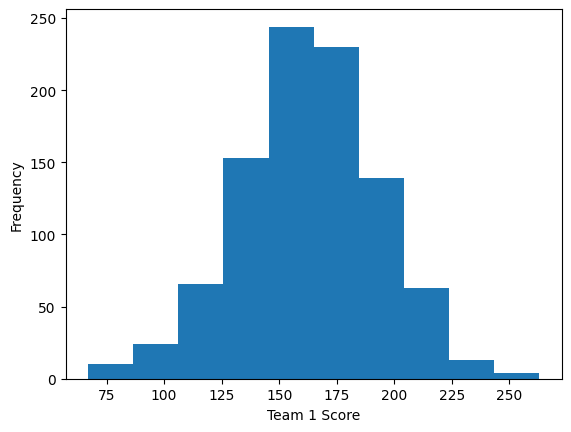

In [10]:
# Histogram of team1 scores
plt.hist(ipl_df['team1_score'], bins=10)
plt.xlabel('Team 1 Score')
plt.ylabel('Frequency')
plt.show()


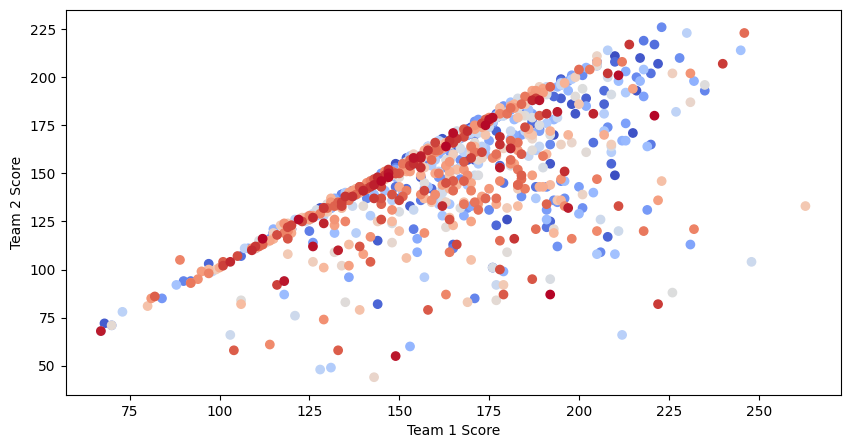

In [11]:
# Scatter plot of team1 score vs. team2 score
plt.figure(figsize=(10, 5))
colors = plt.get_cmap('coolwarm')(np.linspace(0, 1, len(ipl_df)))
plt.scatter(ipl_df['team1_score'], ipl_df['team2_score'], c=colors)
plt.xlabel('Team 1 Score')
plt.ylabel('Team 2 Score')
plt.show()

<ipython-input-12-64d8faca6b37>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = ipl_df.corr()


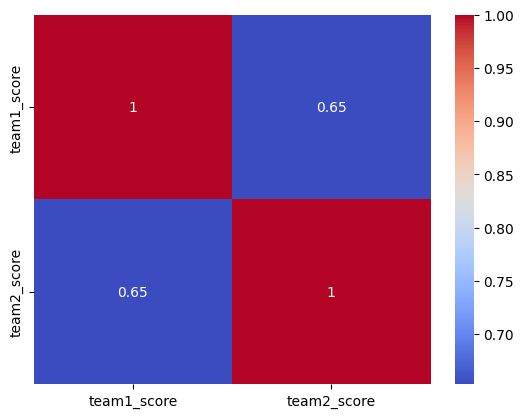

In [12]:
# Heatmap of correlation matrix
corr_matrix = ipl_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

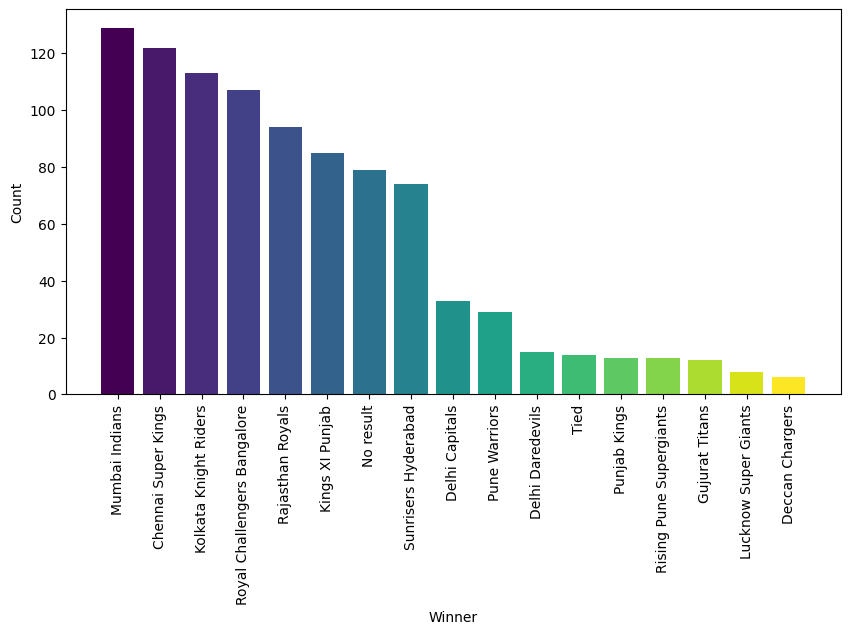

In [13]:
# Bar chart of winners
plt.figure(figsize=(10, 5))
winners_counts = ipl_df['winner'].value_counts()
colors = plt.get_cmap('viridis')(np.linspace(0, 1, len(winners_counts)))
plt.bar(winners_counts.index, winners_counts.values, color=colors)
plt.xticks(rotation=90)
plt.xlabel('Winner')
plt.ylabel('Count')
plt.show()

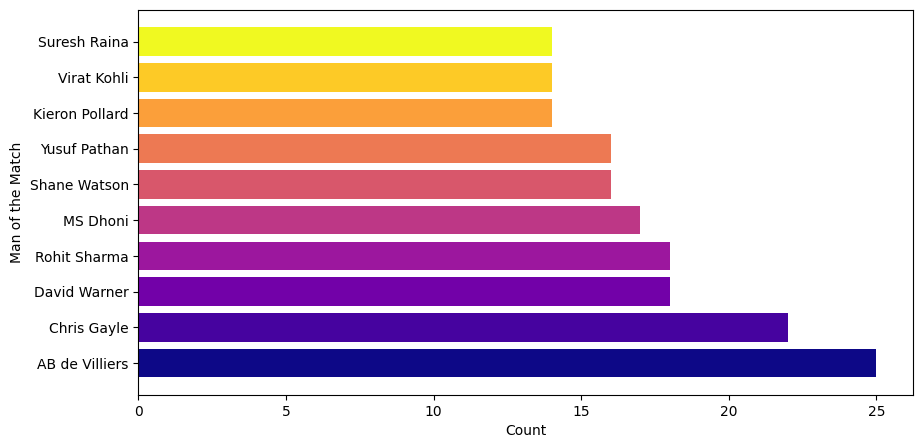

In [14]:
plt.figure(figsize=(10, 5))
top_n = 10
man_of_the_match_counts = ipl_df['man_of_the_match'].value_counts()[:top_n]
colors = plt.get_cmap('plasma')(np.linspace(0, 1, len(man_of_the_match_counts)))
if 'Other' in man_of_the_match_counts:
    del man_of_the_match_counts['Other'] # Remove 'Other' category if present
plt.barh(man_of_the_match_counts.index, man_of_the_match_counts.values, color=colors)
plt.ylabel('Man of the Match')
plt.xlabel('Count')
plt.xticks(fontsize=10)
plt.show()

In [15]:
# Descriptive statistics of numerical columns in ipl_df
numerical_cols = ['team1_score', 'team2_score', 'margin']
print(ipl_df[numerical_cols].describe())

       team1_score  team2_score
count   946.000000   946.000000
mean    162.564482   149.552854
std      30.087677    30.054692
min      67.000000    44.000000
25%     143.000000   132.250000
50%     163.000000   151.000000
75%     183.000000   170.000000
max     263.000000   226.000000


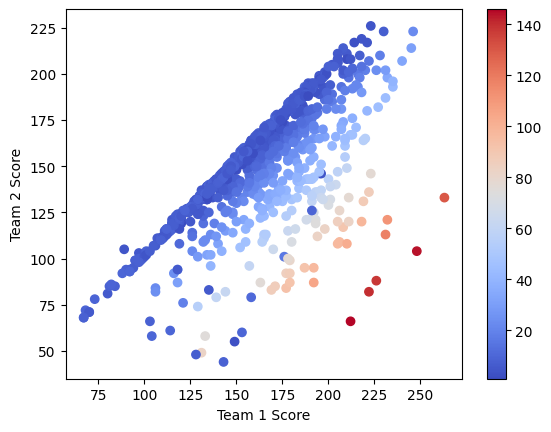

In [16]:
#Scatter plot
margin_values = ipl_df['margin'].str.extract(r'(\d+\.?\d*)').astype(float)
plt.scatter(ipl_df['team1_score'], ipl_df['team2_score'], c=margin_values, cmap='coolwarm')
plt.xlabel('Team 1 Score')
plt.ylabel('Team 2 Score')
plt.colorbar()
plt.show()

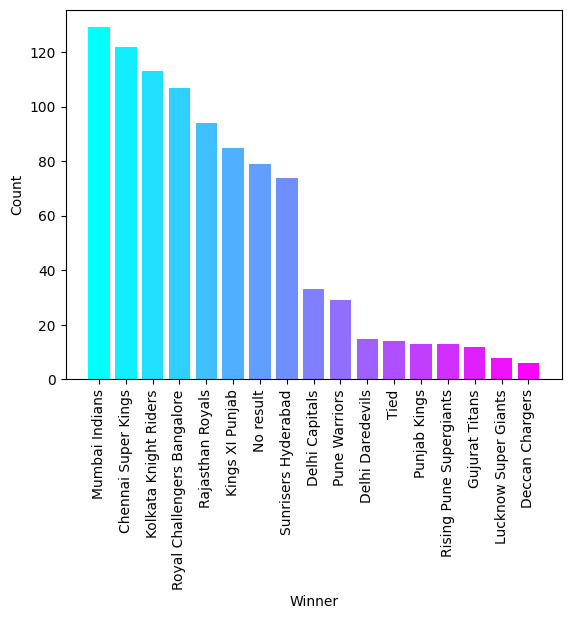

In [17]:
#Bar Chart
winners_counts = ipl_df['winner'].value_counts()
colors = plt.cm.cool(np.linspace(0, 1, len(winners_counts)))
plt.bar(winners_counts.index, winners_counts.values, color=colors)
plt.xticks(rotation=90)
plt.xlabel('Winner')
plt.ylabel('Count')
plt.show()

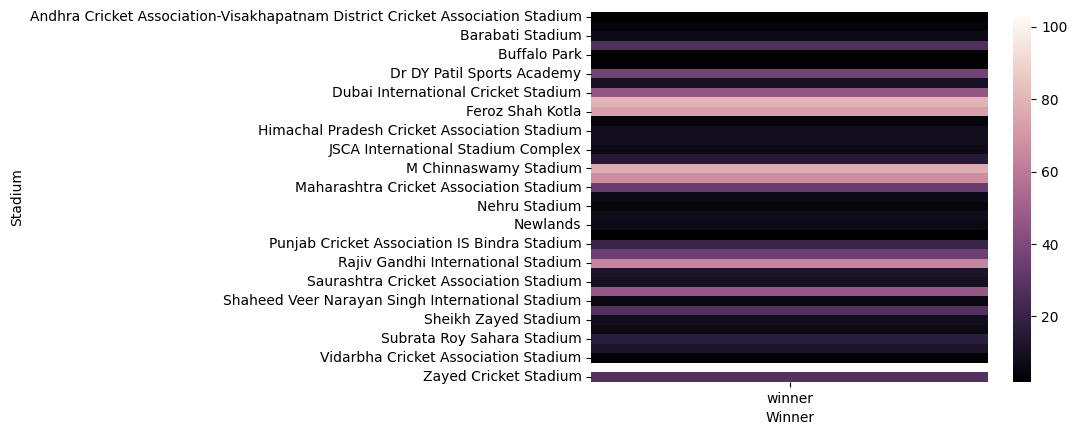

In [18]:
#Heatmap
winners_by_stadium = ipl_df.pivot_table(values='winner', index='stadium', aggfunc='count', fill_value=0)
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.heatmap(winners_by_stadium, cmap=cmap)
plt.xlabel('Winner')
plt.ylabel('Stadium')
plt.show()

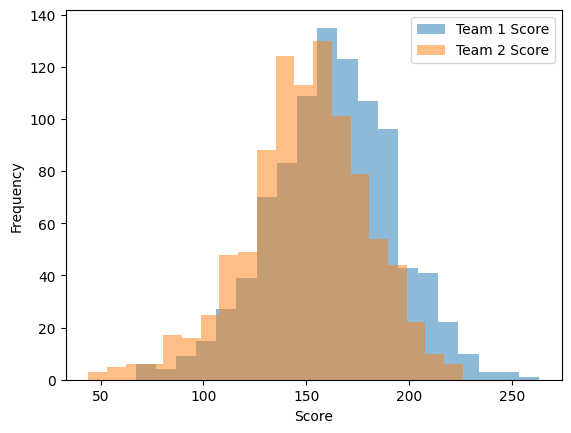

In [19]:
#Histogram
plt.hist(ipl_df['team1_score'], bins=20, alpha=0.5, label='Team 1 Score')
plt.hist(ipl_df['team2_score'], bins=20, alpha=0.5, label='Team 2 Score')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [20]:
# Create a new feature called score_diff
ipl_df['score_diff'] = ipl_df['team1_score'] - ipl_df['team2_score']

# Define a function to classify stadiums based on their location
def get_venue_type(stadium):
    if 'International' in stadium:
        return 'International'
    else:
        return 'Domestic'

# Create a new feature called venue_type
ipl_df['venue_type'] = ipl_df['stadium'].apply(get_venue_type)

In [21]:
#spliting the data into training and testing sets
X = ipl_df[['team1_score', 'team2_score', 'score_diff', 'stadium', 'venue_type']]
y = ipl_df['winner']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
# Define the columns to be encoded and scaled
cat_cols = ['stadium', 'venue_type']
num_cols = ['team1_score', 'team2_score', 'score_diff']

# Define the preprocessing steps
preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), cat_cols),
    ('scale', StandardScaler(), num_cols)
])

# Preprocess the training and testing data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)


In [23]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model on the testing data
accuracy = model.score(X_test, y_test)
print(f'Testing accuracy: {accuracy:.3f}')


Testing accuracy: 0.342


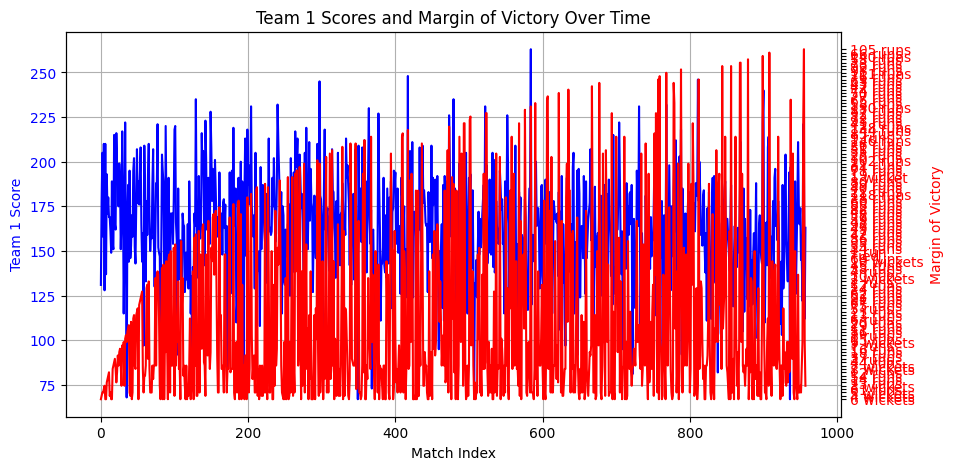

In [24]:
# Create a time series of the team1 scores over time
team1_scores = ipl_df[['team1_score']].set_index(ipl_df.index)

# Plot the time series with color
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(team1_scores, color='blue')
ax.set_ylabel('Team 1 Score', color='blue')
ax.tick_params(axis='y', labelcolor='blue')

# Add gridlines and set x-axis label
ax.grid(True)
ax.set_xlabel('Match Index')

# Add a second y-axis for the margin data
ax2 = ax.twinx()
ax2.set_ylabel('Margin of Victory', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.plot(ipl_df['margin'], color='red')

# Set the title and display the plot
plt.title('Team 1 Scores and Margin of Victory Over Time')
plt.show()


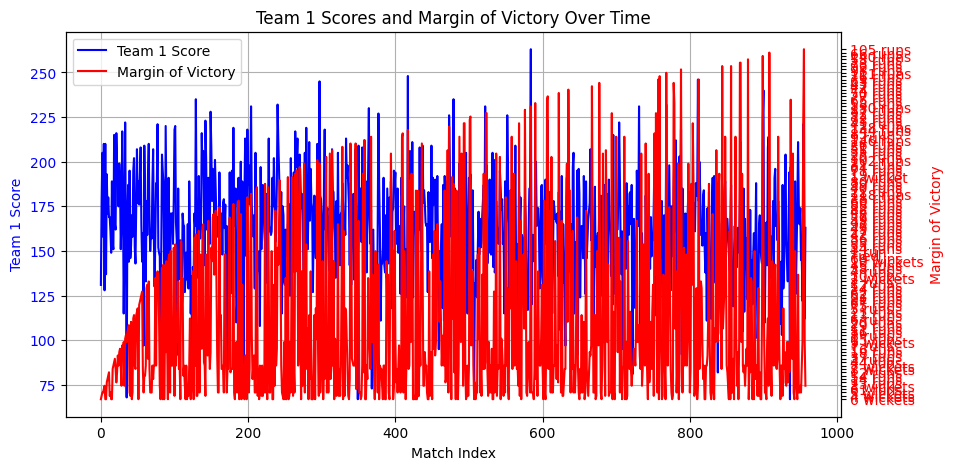

In [25]:
# Plot the time series with color and labels
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(team1_scores, color='blue', label='Team 1 Score')
ax.set_ylabel('Team 1 Score', color='blue')
ax.tick_params(axis='y', labelcolor='blue')
ax.grid(True)
ax.set_xlabel('Match Index')

ax2 = ax.twinx()
ax2.set_ylabel('Margin of Victory', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.plot(ipl_df['margin'], color='red', label='Margin of Victory')

# Add a legend
lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best')

plt.title('Team 1 Scores and Margin of Victory Over Time')
plt.show()

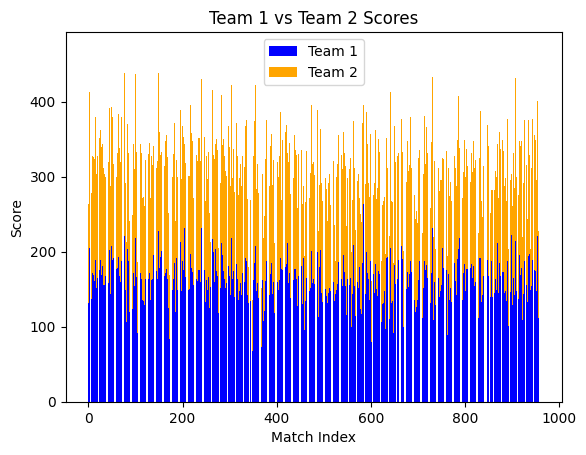

In [26]:
#Stacked Bar Chart
plt.bar(ipl_df.index, ipl_df['team1_score'], color='blue', label='Team 1')
plt.bar(ipl_df.index, ipl_df['team2_score'], bottom=ipl_df['team1_score'], color='orange', label='Team 2')
plt.xlabel('Match Index')
plt.ylabel('Score')
plt.title('Team 1 vs Team 2 Scores')
plt.legend()
plt.show()

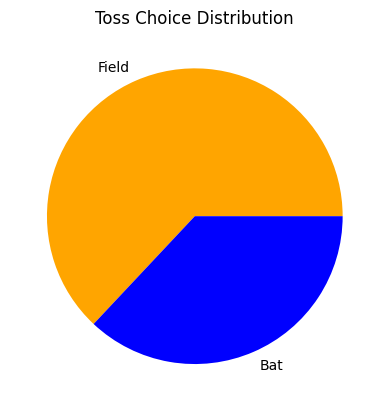

In [27]:
#Pie Chart
plt.pie(ipl_df['toss_choice'].value_counts(), labels=ipl_df['toss_choice'].value_counts().index, colors=['orange', 'blue'])
plt.title('Toss Choice Distribution')
plt.show()

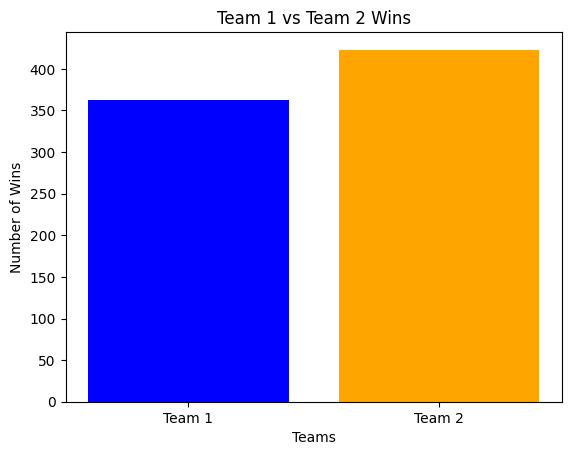

In [28]:
#Bar Chart
plt.bar(['Team 1', 'Team 2'], [ipl_df[ipl_df['winner']==ipl_df['team1']]['winner'].count(), ipl_df[ipl_df['winner']==ipl_df['team2']]['winner'].count()], color=['blue', 'orange'])
plt.xlabel('Teams')
plt.ylabel('Number of Wins')
plt.title('Team 1 vs Team 2 Wins')
plt.show()

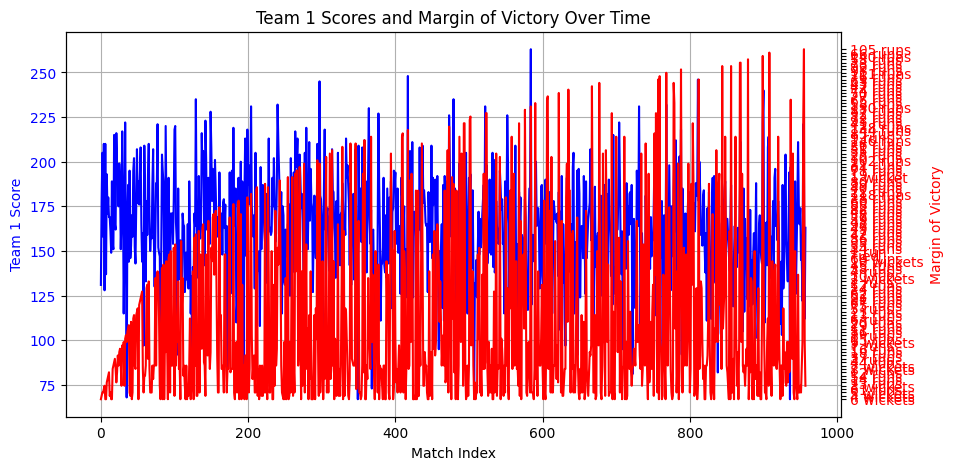

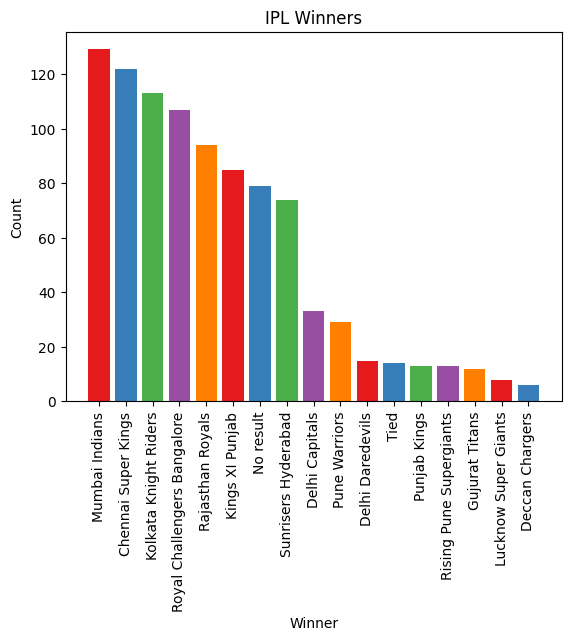

In [29]:
# Create a time series of the team1 scores over time
team1_scores = ipl_df[['team1_score']].set_index(ipl_df.index)

# Plot the time series with color
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(team1_scores, color='blue')
ax.set_ylabel('Team 1 Score', color='blue')
ax.tick_params(axis='y', labelcolor='blue')

# Add gridlines and set x-axis label
ax.grid(True)
ax.set_xlabel('Match Index')

# Add a second y-axis for the margin data
ax2 = ax.twinx()
ax2.set_ylabel('Margin of Victory', color='red')
ax2.tick_params(axis='y', labelcolor='red')
ax2.plot(ipl_df['margin'], color='red')

# Set the title and display the plot
plt.title('Team 1 Scores and Margin of Victory Over Time')
plt.show()

# Create a bar chart of winners
plt.bar(ipl_df['winner'].value_counts().index, ipl_df['winner'].value_counts().values, color=['#E41A1C', '#377EB8', '#4DAF4A', '#984EA3', '#FF7F00'])
plt.xticks(rotation=90)
plt.xlabel('Winner')
plt.ylabel('Count')
plt.title('IPL Winners')
plt.show()